In [3]:
import sys
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
tk = th.Thicket.from_caliperreader(glob("SpeedupRadix/*.cali"))

(1/2) Reading Files:   0%|          | 0/37 [00:00<?, ?it/s]

(2/2) Creating Thicket: 100%|██████████| 36/36 [00:00<00:00, 146.30it/s]
/home/matthew/.local/lib/python3.10/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


In [5]:
tk.metadata.head()

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,
58217464,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a268435456-sradix-isorted.cali,true,true,true,true,1729644968,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, sorted]",c,radix,mpi,int,4,268435456,sorted,512,8,online
394161575,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p256-a268435456-sradix-i1perturbed.cali,true,true,true,true,1729643522,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, 1perturbed]",c,radix,mpi,int,4,268435456,1perturbed,256,8,online
457772658,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a268435456-sradix-isorted.cali,true,true,true,true,1729644543,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, sorted]",c,radix,mpi,int,4,268435456,sorted,32,8,online
749261688,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a268435456-sradix-i1perturbed.cali,true,true,true,true,1729643557,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, 1perturbed]",c,radix,mpi,int,4,268435456,1perturbed,32,8,online
767189549,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p128-a268435456-sradix-irandom.cali,true,true,true,true,1729643557,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 268435456, radix, random]",c,radix,mpi,int,4,268435456,random,128,8,online


In [6]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

17.448 main
├─ 8.025 MPI_Comm_dup
├─ 0.141 MPI_Comm_split
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 6.370 comm
│  └─ 6.369 comm_large
│     ├─ 0.078 MPI_Allreduce
│     ├─ 0.197 MPI_Alltoall
│     ├─ 0.143 MPI_Alltoallv
│     ├─ 0.094 MPI_Bcast
│     ├─ 0.001 MPI_Gather
│     ├─ 5.463 MPI_Gatherv
│     └─ 0.394 MPI_Scatterv
├─ 0.080 comp
│  ├─ 0.076 comp_large
│  └─ 0.004 comp_small
├─ 0.014 correctness_check
└─ 0.836 data_init_runtime
   └─ 0.825 MPI_Gather

Legend (Metric: Avg time/rank Min: 0.00 Max: 17.45 indices: {'profile': 58217464})
█ 15.70 - 17.45
█ 12.21 - 15.70
█ 8.72 - 12.21
█ 5.23 - 8.72
█ 1.74 - 5.23
█ 0.00 - 1.74

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("algorithm")
tk.dataframe = tk.dataframe.reset_index()
tk.dataframe.head()

,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,"{'name': 'main', 'type': 'function'}",58217464,1.0,regionprofile,17.398380,17.463353,17.447950,8933.350497,0.000099,1.731319,6.652791,1.981538,1014.547204,NaN,NaN,NaN,NaN,main,512,sorted,268435456,radix
1,"{'name': 'main', 'type': 'function'}",394161575,1.0,regionprofile,18.242973,18.325821,18.302510,4685.442518,0.000320,1.728659,6.490404,2.440578,624.788002,NaN,NaN,NaN,NaN,main,256,1perturbed,268435456,radix
2,"{'name': 'main', 'type': 'function'}",457772658,1.0,regionprofile,78.094860,78.095114,78.095040,2499.041272,0.000000,2.030908,65.758596,6.125769,196.024621,NaN,NaN,NaN,NaN,main,32,sorted,268435456,radix
3,"{'name': 'main', 'type': 'function'}",749261688,1.0,regionprofile,78.512952,78.513180,78.513087,2512.418793,0.000000,2.077145,65.971959,6.202786,198.489140,NaN,NaN,NaN,NaN,main,32,1perturbed,268435456,radix
4,"{'name': 'main', 'type': 'function'}",767189549,1.0,regionprofile,14.029124,14.041961,14.035045,1796.485708,0.000010,1.668603,3.340814,2.475350,316.844742,NaN,NaN,NaN,NaN,main,128,random,268435456,radix


In [8]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line",
    marker='o',
    title=title,
    xlabel=xlabel,
    ylabel=ylabel,
    figsize=(15,7)
    )
    return plot

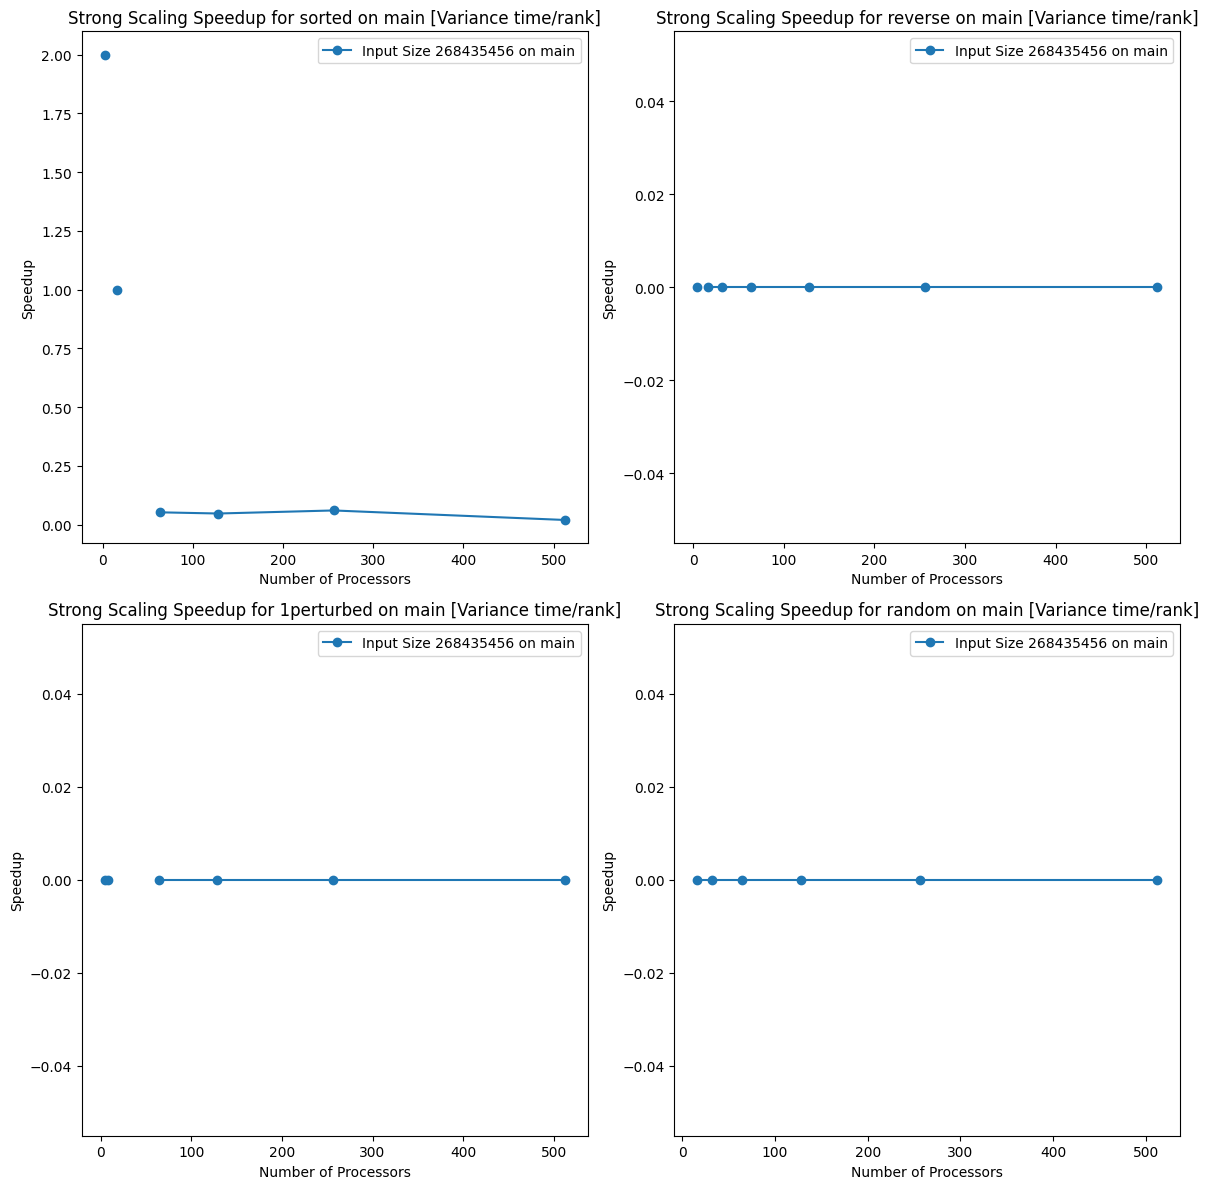

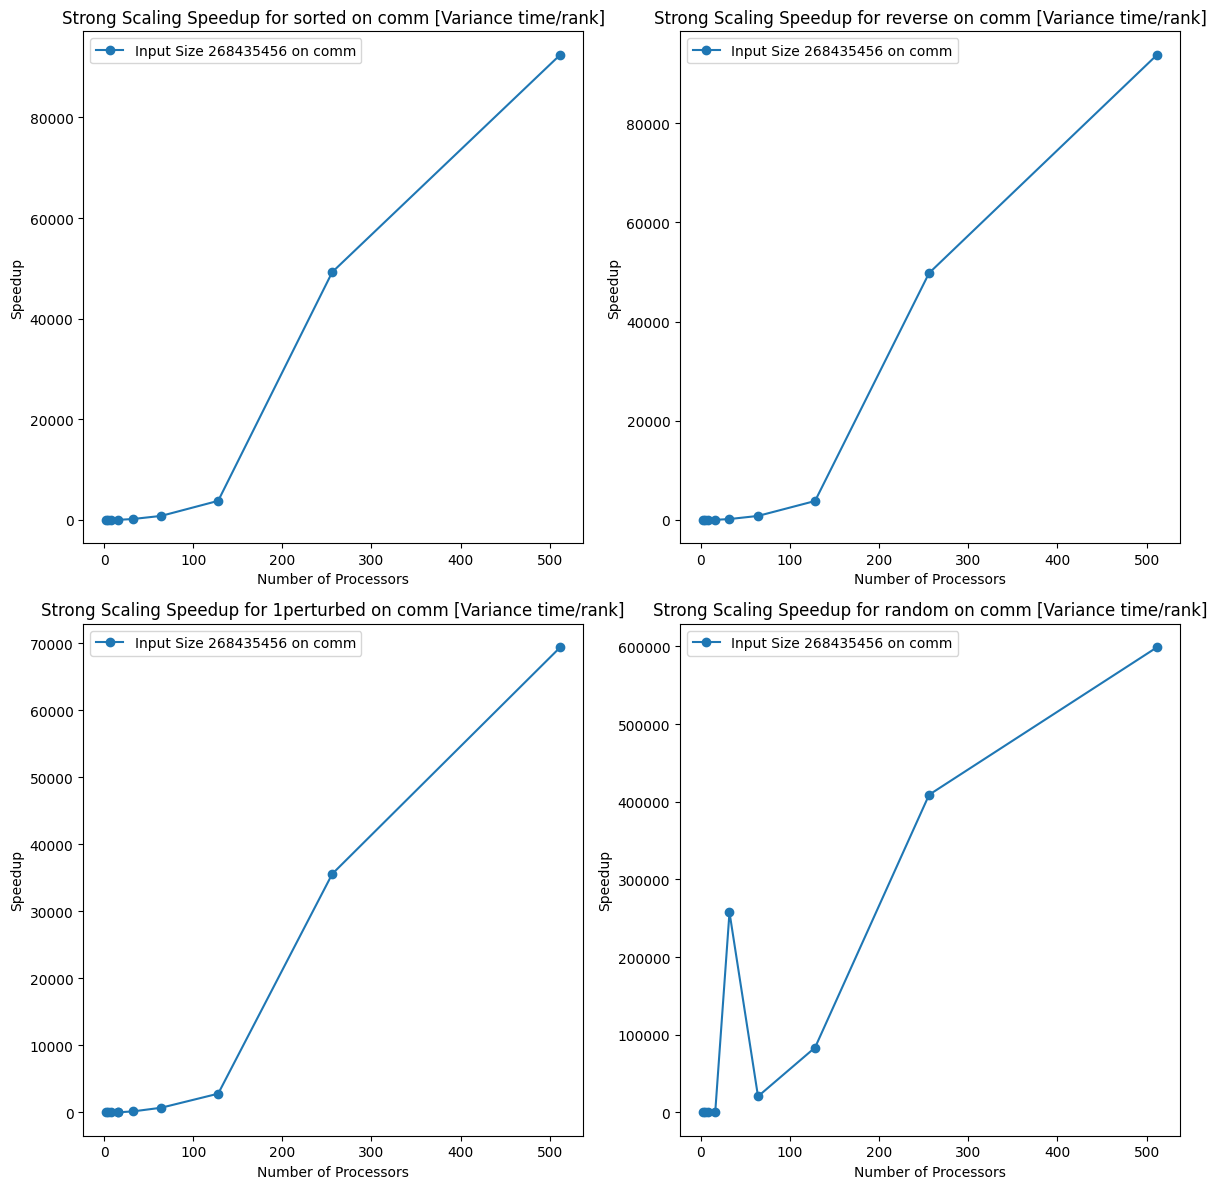

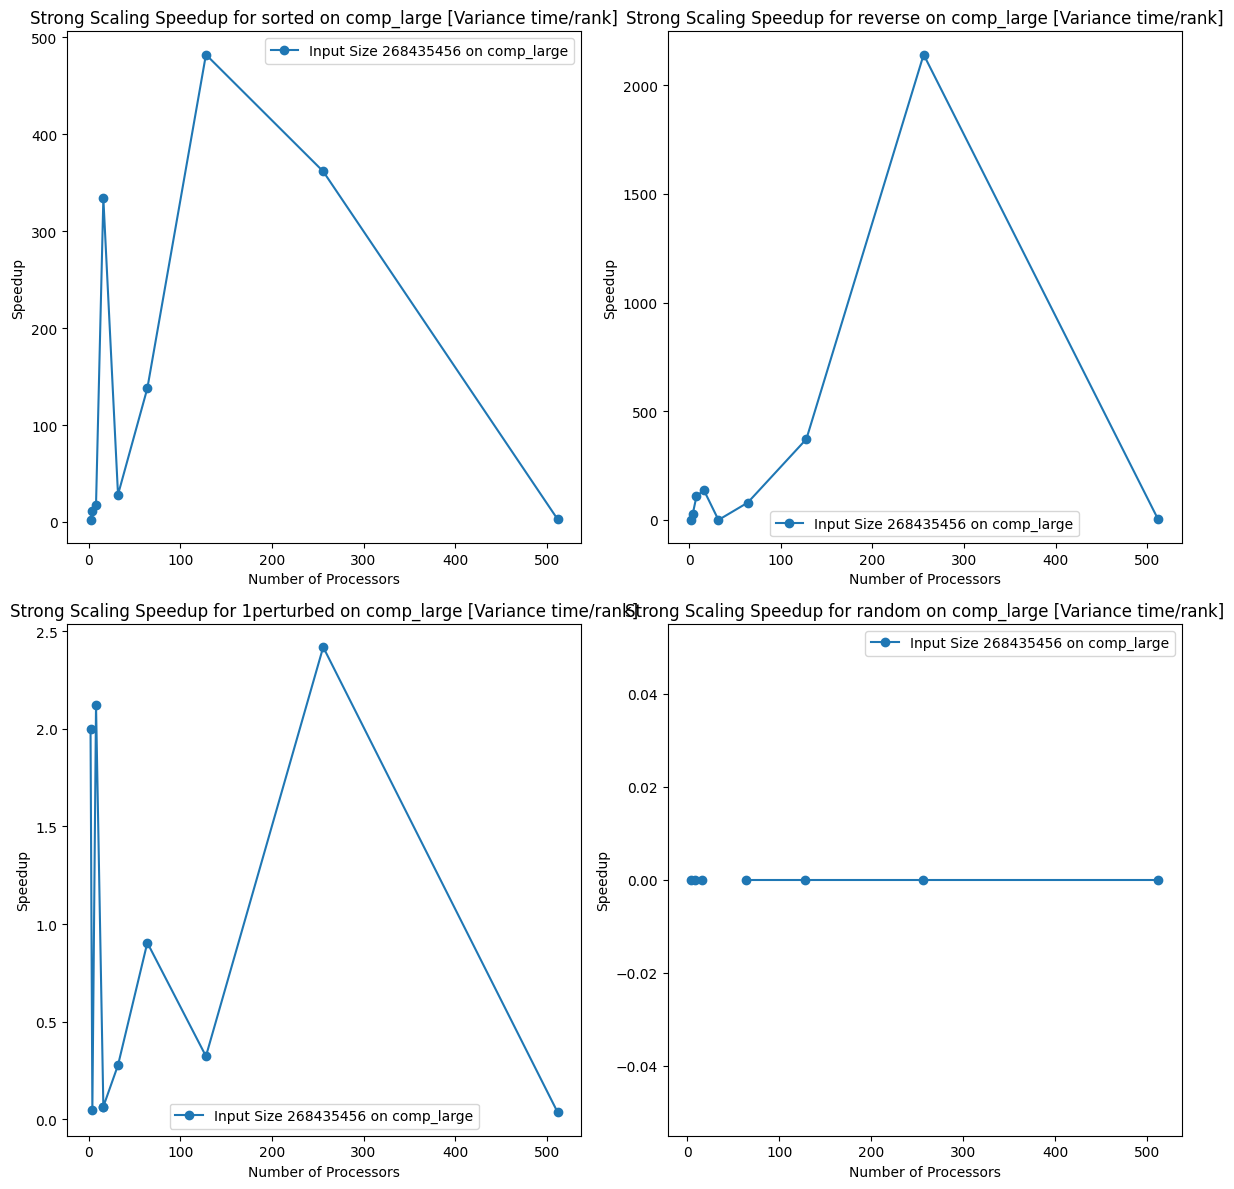

In [10]:
import os

input_sizes = [268435456] # Largest problem size
input_types = ["sorted", "reverse", "1perturbed", "random"]

# Change "type_selector" to the index of what you want to measure
time_types = ["Min time/rank", "Max time/rank", "Avg time/rank", "Total time", "Variance time/rank"]
file_output_label = ["min", "max", "avg", "total", "variance"]
type_selector = 4

# Prepare output folder for plots
output_dir = '../plot_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to create strong scaling speedup plots with 2x2 subplots
def plot_speedup(tk, input_types):
    for node in tk.graph.traverse():
        node_name = node.frame['name']
        if (node_name == 'comp_large') or (node_name == 'comm') or (node_name == 'main'):
            fig, axs = plt.subplots(2, 2, figsize=(12, 12))
            
            axs = axs.flatten()
            for idx, input_type in enumerate(input_types):
                ax = axs[idx]
                
                # Add node filter to baseline calculation
                baseline_time = tk.dataframe[
                    (tk.dataframe["num_procs"] == 2) & 
                    (tk.dataframe["input_type"] == input_type) &
                    (tk.dataframe['node'] == node)  # Added node filter
                ][time_types[type_selector]].values[0] * 2
                
                for input_size in input_sizes:
                    data = tk.dataframe[
                        (tk.dataframe["input_type"] == input_type) & 
                        (tk.dataframe["input_size"] == input_size) & 
                        (tk.dataframe['node'] == node)
                    ]
                    data = data.sort_values(by="num_procs")
                    
                    speedup = baseline_time / data[time_types[type_selector]]
                    ax.plot(data["num_procs"], speedup, marker='o', 
                           label=f'Input Size {input_size} on {node_name}')
                
                ax.set_title(f'Strong Scaling Speedup for {input_type} on {node_name} [{time_types[type_selector]}]')
                ax.set_xlabel('Number of Processors')
                ax.set_ylabel('Speedup')
                ax.legend()
            
            for j in range(idx + 1, len(axs)):
                fig.delaxes(axs[j])
            
            plt.tight_layout()
            filename = f'speedup_{file_output_label[type_selector]}_{input_type}_{node_name}_size{input_size}.png'
            filepath = os.path.join(output_dir, filename)
            plt.savefig(filepath, format='png', dpi=300)
            plt.show()



plot_speedup(tk, input_types)

In [35]:
tk.dataframe = tk.dataframe.reset_index()#.set_index(["node"])
tk.dataframe

,index,node,profile,nid,spot.channel,Min time/rank,Max time/rank,Avg time/rank,Total time,Variance time/rank,Min time/rank (exc),Max time/rank (exc),Avg time/rank (exc),Total time (exc),Calls/rank (min),Calls/rank (avg),Calls/rank (max),Calls/rank (total),name,num_procs,input_type,input_size,algorithm
0,0,"{'name': 'main', 'type': 'function'}",56591492,1.0,regionprofile,25.349132,25.352141,25.351094,202.808755,0.000001,1.233769,1.248979,1.241377,9.931019,NaN,NaN,NaN,NaN,main,8,reverse,268435456,bitonic
1,1,"{'name': 'main', 'type': 'function'}",328016179,1.0,regionprofile,28.032671,28.036947,28.035117,448.561872,0.000002,1.331072,1.343062,1.335912,21.374595,NaN,NaN,NaN,NaN,main,16,random,268435456,bitonic
2,2,"{'name': 'main', 'type': 'function'}",713112723,1.0,regionprofile,13.072378,13.103864,13.088514,3350.659661,0.000046,1.778123,2.849893,2.312660,592.040921,NaN,NaN,NaN,NaN,main,256,reverse,268435456,bitonic
3,3,"{'name': 'main', 'type': 'function'}",850810367,1.0,regionprofile,17.740805,17.747480,17.744882,567.836223,0.000006,1.905881,1.944063,1.930268,61.768571,NaN,NaN,NaN,NaN,main,32,reverse,268435456,bitonic
4,4,"{'name': 'main', 'type': 'function'}",948327981,1.0,regionprofile,26.602613,26.611005,26.607037,851.425177,0.000008,1.947204,1.982638,1.968374,62.987968,NaN,NaN,NaN,NaN,main,32,1perturbed,268435456,bitonic
5,5,"{'name': 'main', 'type': 'function'}",1241686955,1.0,regionprofile,33.302406,33.305213,33.303454,133.213815,0.000001,1.234114,1.238549,1.236405,4.945619,NaN,NaN,NaN,NaN,main,4,reverse,268435456,bitonic
6,6,"{'name': 'main', 'type': 'function'}",1404844639,1.0,regionprofile,14.650375,14.712032,14.678670,7515.479039,0.000121,1.769679,2.060826,1.859741,952.187224,NaN,NaN,NaN,NaN,main,512,1perturbed,268435456,bitonic
7,7,"{'name': 'main', 'type': 'function'}",1441664583,1.0,regionprofile,13.147807,13.169031,13.156887,1684.081504,0.000021,1.757627,1.792847,1.772053,226.822810,NaN,NaN,NaN,NaN,main,128,sorted,268435456,bitonic
8,8,"{'name': 'main', 'type': 'function'}",1453323555,1.0,regionprofile,60.537713,60.539540,60.538279,242.153115,0.000001,1.139973,1.146216,1.142117,4.568469,NaN,NaN,NaN,NaN,main,4,random,268435456,bitonic
9,9,"{'name': 'main', 'type': 'function'}",1566850431,1.0,regionprofile,24.240285,24.287536,24.265167,1552.970713,0.000372,1.769932,1.893725,1.830781,117.170011,NaN,NaN,NaN,NaN,main,64,reverse,268435456,bitonic
